# Homework  
Data documentation: https://tidyr.tidyverse.org/reference/who.html

Directions: Answer the three questions below. Create as many code/markdown blocks necessary to answer the questions. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('who.csv')

In [2]:
df = df.drop(columns=['iso2', 'iso3'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7240 entries, 0 to 7239
Data columns (total 58 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       7240 non-null   object 
 1   year          7240 non-null   int64  
 2   new_sp_m014   3173 non-null   float64
 3   new_sp_m1524  3209 non-null   float64
 4   new_sp_m2534  3206 non-null   float64
 5   new_sp_m3544  3219 non-null   float64
 6   new_sp_m4554  3223 non-null   float64
 7   new_sp_m5564  3218 non-null   float64
 8   new_sp_m65    3209 non-null   float64
 9   new_sp_f014   3174 non-null   float64
 10  new_sp_f1524  3194 non-null   float64
 11  new_sp_f2534  3200 non-null   float64
 12  new_sp_f3544  3199 non-null   float64
 13  new_sp_f4554  3204 non-null   float64
 14  new_sp_f5564  3195 non-null   float64
 15  new_sp_f65    3197 non-null   float64
 16  new_sn_m014   1045 non-null   float64
 17  new_sn_m1524  1030 non-null   float64
 18  new_sn_m2534  1022 non-null 

#### Question 1. We need to know what's included in this data.
- How many countries are present?  
- What's the timespan of the data?  
- Does each country have a row for every year present?  
- Which countries are missing years?  
- How many rows have at least 1 non-null values across the columns 3-57?

In [3]:
#How many countries are present?
#
cou=set(df['country'])
print("Number of Countries: ",len(cou))

Number of Countries:  219


In [4]:
#What's the timespan of the data?
print("Timespan of the data:",df['year'].max()-df['year'].min()+1,"Years") 

Timespan of the data: 34 Years


In [5]:
#Does each country have a row for every year present?
df2=df['country'].value_counts().reset_index(name='Count')
df2.loc[df2.Count != 34]

,index,Count
210,Netherlands Antilles,30
211,Serbia & Montenegro,25
212,Timor-Leste,12
213,Serbia,9
214,Montenegro,9
215,Curacao,4
216,Sint Maarten (Dutch part),4
217,"Bonaire, Saint Eustatius and Saba",4
218,South Sudan,3


> Inferences:

We can infert that all the countries has no rows present for every year

In [6]:
#Which countries are missing years?
df2['index'][df2['Count']!=34]

210                 Netherlands Antilles
211                  Serbia & Montenegro
212                          Timor-Leste
213                               Serbia
214                           Montenegro
215                              Curacao
216            Sint Maarten (Dutch part)
217    Bonaire, Saint Eustatius and Saba
218                          South Sudan
Name: index, dtype: object

In [7]:
#How many rows have at least 1 non-null values across the columns 3-57?
print("Number of rows having at least 1 non-null values across the columns 3-57 :",df.iloc[:,2:].notnull().any(axis=1).sum())

Number of rows having at least 1 non-null values across the columns 3-57 : 3484


#### Question 2: Wide data isn't usually helpful.
Convert this to a long format with the following columns:  
1. country  
2. year  
3. diagnosis method: mapping should be: 

  {'newsp':'Pulmonary Smear (+)'
  ,'newsn':'Pulmonary Smear (-)'
  ,'newep':'Extrapulmonary'
  ,'newrel':'Relapse'}   
  

4. gender: male or female.   
5. age: lower_age - higher_age, e.g., 0-14  
6. number of cases  

In [8]:
df1 = df.melt(id_vars=['country','year'], var_name='diagnosis method', value_name='NumberofCases')
df1['Age'] = df1['diagnosis method'].str.extract(r'([\d]+)',expand=True).replace(['014','1524','2534','3544','4554','5564','65'],['0-14','15-24','25-34','35-44','45-54','55-64','65+'],regex=True)
df1['gender'] = df1['diagnosis method'].str[7:8].replace(['m','f'],['Male','Female'],regex=True)
df1['Diagnosis_Method'] = df1['diagnosis method'].str[:7].replace(['new_sp_', 'new_sn_','new_ep_','newrel_'],['Pulmonary Smear (+)','Pulmonary Smear (-)','Extrapulmonary','Relapse'], regex=True)
df1=df1.drop(['diagnosis method'], axis = 1)
df1.head(10)

,country,year,NumberofCases,Age,gender,Diagnosis_Method
0,Afghanistan,1980,NaN,0-14,Male,Pulmonary Smear (+)
1,Afghanistan,1981,NaN,0-14,Male,Pulmonary Smear (+)
2,Afghanistan,1982,NaN,0-14,Male,Pulmonary Smear (+)
3,Afghanistan,1983,NaN,0-14,Male,Pulmonary Smear (+)
4,Afghanistan,1984,NaN,0-14,Male,Pulmonary Smear (+)
5,Afghanistan,1985,NaN,0-14,Male,Pulmonary Smear (+)
6,Afghanistan,1986,NaN,0-14,Male,Pulmonary Smear (+)
7,Afghanistan,1987,NaN,0-14,Male,Pulmonary Smear (+)
8,Afghanistan,1988,NaN,0-14,Male,Pulmonary Smear (+)
9,Afghanistan,1989,NaN,0-14,Male,Pulmonary Smear (+)


 Question 3: Create a graph that shows when countries started to report TB cases.

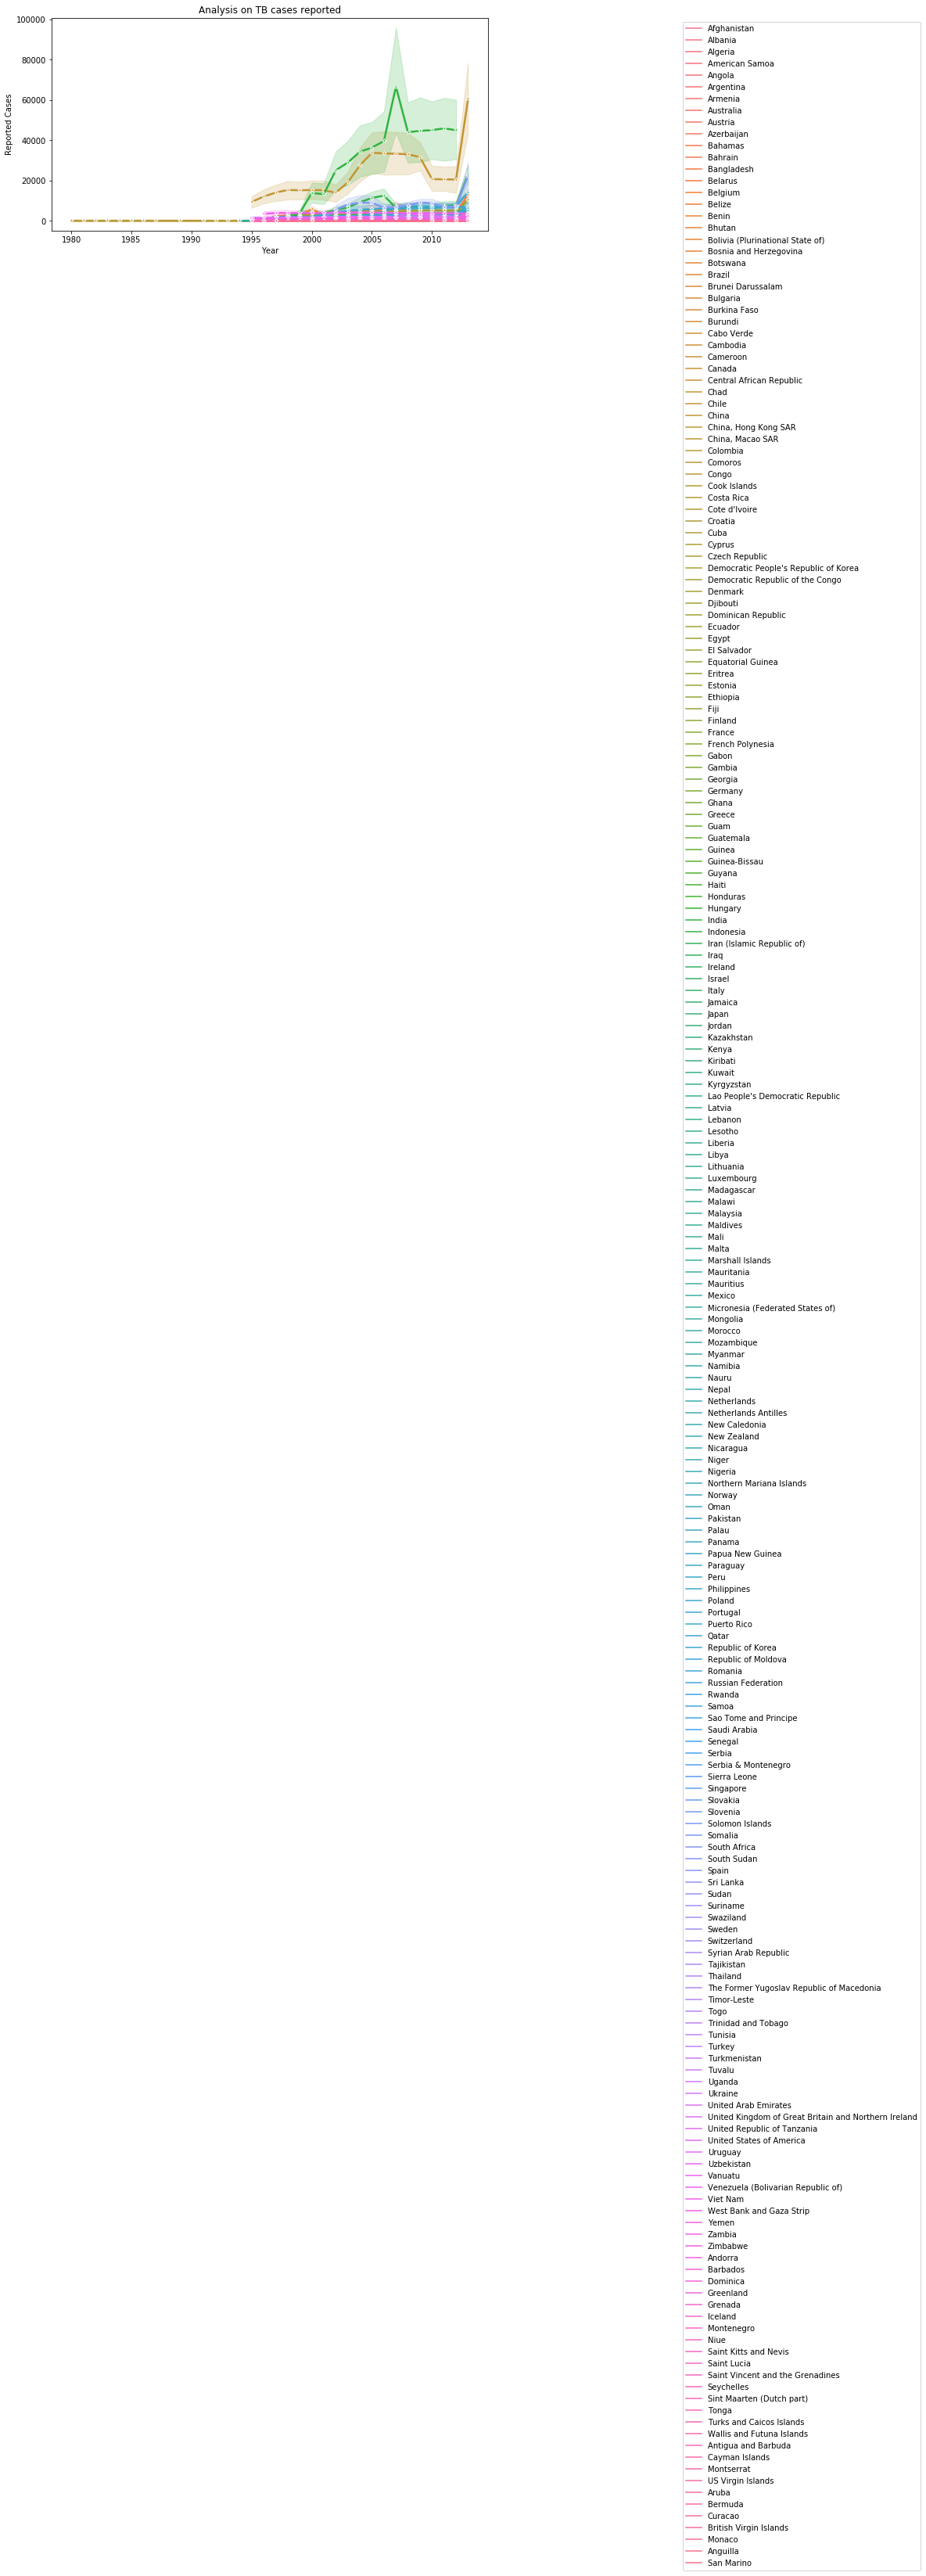

In [11]:
plt.figure(figsize=(10, 5))
plot = sns.lineplot(x='year', y='NumberofCases', hue="country",marker='*', data=df1[df1['NumberofCases'].notna() & df1['NumberofCases']>0], linewidth=2.5)
plot.set(xlabel='Year', ylabel='Reported Cases', title='Analysis on TB cases reported')
plot.legend(loc='upper right', bbox_to_anchor=(2, 1))
plt.show()